# Convex Optimization: Convexity

**Prerequisites**

- Linear Algebra
- Calculus


**Outcomes**

TODO: clean this up

## Outline

- Convex Sets
- Mathematical Functions
- Linear Programming
- The Dual Problem
- `cvxopt` and `scipy.optimize.linprog`

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set(style="ticks")
%matplotlib inline

def make_origin(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

## Convex Sets

Let $C \subseteq \mathbb{R}^n$

$C$ is *convex* if for any $x_1, x_2 \in C$ and any $\theta \in [0, 1]$ we have $$\theta x_1 + (1- \theta) x_2 \in C$$

### Convex Combination

The definition of convexity can be extended to include convex combinations

A (finite) *convex combination* of $x_i \in {C}\; i = 1, \dots, k$ has the form $$\sum_{i=1}^k \theta_i x_i, \quad \theta_i \ge 0 \; i = 1, \dots, k, \; \sum_{i=1}^k \theta_i = 1$$

<a id='exercise-0'></a>
**Exercise 1**

Show that for a convex set $C \subseteq \mathbb{R}^n$ any convex combination of members of $C$ is in $C$

### Convex Hull

The *convex hull* of a set $C$ ($\textbf{conv} C$) is the set of all covex combinations of points in $C$: $$\textbf{conv}C = \left\{\sum_{i=1}^k \theta_i x_i \bigm \vert x_i \in C, \theta_i \ge 0, i = 1, \dots k, \sum_{i=1}^k \theta_i = 1 \right\}$$

#### Example

Consider this set of random points in $\mathbb{R}^2$


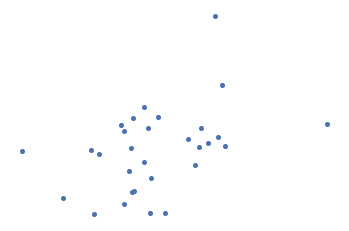

In [11]:
X = np.random.randn(30, 2)  # 30 points in R2
fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], "o", ms=4);
ax.axis("off");

The convex hull of this set of points is

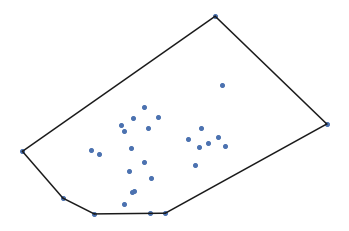

In [12]:
from scipy.spatial import ConvexHull
_, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], "o", ms=4)
for simplex in ConvexHull(X).simplices:
    ax.plot(X[simplex, 0], X[simplex, 1], "k-")
ax.axis("off");

The convex hull of a set $C$ is the smallest convex that contains $C$

<a id='exercise-1'></a>
**Exercise 2**

Draw the convex hull of the set in the image below

![Non-convex-set](non-convex-set.png)

<a id='exercise-2'></a>
**Exercise 3**

Show that if $C$ is convex, then $\textbf{conv} C = C$

## Mathematical Functions


### Functions

A function $f: A \rightarrow B$ is 

- a mapping (relation) from a set of inputs ($A$) to a set of outputs ($B$)
- and each input is related to exactly one output

#### Function Domain

The **domain** of a function $f: A \rightarrow B$ is the set $A$

We will follow notation of Boyd et al. 2004 and often write $$f: \mathbb{R}^n \rightarrow \mathbb{R}^m,$$

where in the notation above, we mean that $A \subseteq \mathbb{R}^N$

When using this notation, to refer to the domain of $f$ we will use $\textbf{dom} f$

### Linear Functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is *linear* if it can be expressed in the form $$f(x) = Ax, \quad A \in \mathbb{R}^{m \times n}$$

In the case where $m = 1$ we often write $$f(x) = c^Tx,  \quad c \in \mathbb{R}^n$$

In $\mathbb{R}$, a linear function is a straight line passing through the origin

In this case $A$ and $x$ are both scalars and $A$ determines the slope of the line

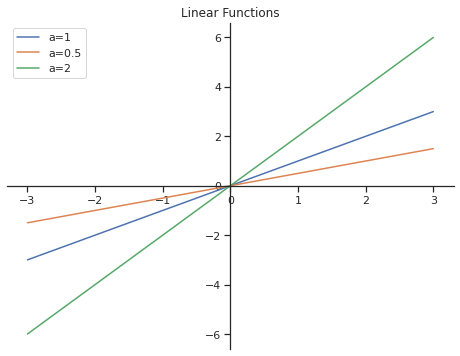

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
x = np.array([-3, 3])
for a in [1, 0.5, 2]:
    ax.plot(x, a*x, label=f"a={a}")
ax.legend(loc=0)
ax.set_title("Linear Functions")
make_origin(ax)

A function $f: \mathbb{R}^2 \rightarrow \mathbb{R}$ is a plane in 3-d space

Here is an example:

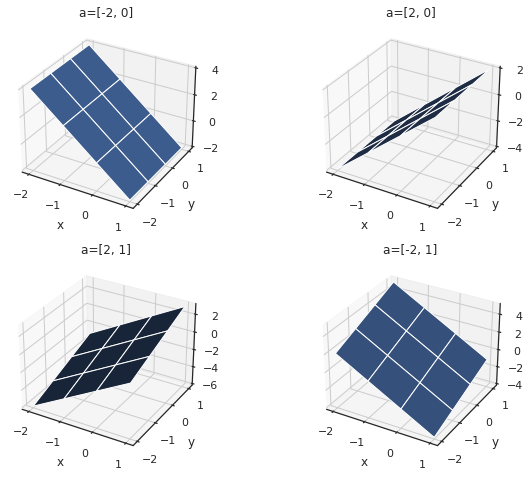

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
x, y = np.mgrid[-2:2,-2:2]
for i, a in enumerate(([-2, 0], [2, 0], [2, 1], [-2, 1])):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_surface(x, y, a[0]*x + a[1]*y,)
    ax.set_title(f"a={a}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

### Affine functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ is *affine* if it is the sum of a linear function and a constant $$f(x) = Ax + b, \quad A \in \mathbb{R}^{m \times n}, \; b \in \mathbb{R}^m$$

When $f: \mathbb{R} \rightarrow \mathbb{R}$, $f$ is a line with y intercept $b$ and slope $A$

In [20]:
from ipywidgets import interactive

def f(a, b):
    fig = plt.figure(2)
    x = np.linspace(-10, 10, num=10)
    plt.plot(x, a * x + b)
    plt.ylim(-5, 5)
    ax = fig.axes[0]
    make_origin(ax)
    plt.show()

interactive_plot = interactive(f, a=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

### Convex Functions

A function $f: \mathbb{R}^n \rightarrow \mathbb{R}$ is *convex* if :

1. $\textbf{dom} f$ is convex
2. $\forall x, y \in \textbf{dom} f$ and $\theta \in [0, 1]$ $$f(\theta x + (1 - \theta) y) \le \theta f(x) + (1 - \theta) f(y)$$

#### Graphical Interpretation

For any convex function $f$ and $x, y \in \textbf{dom} f$ the line between $(x, f(x))$ and $(y, f(y))$ is above the graph $f$

For example:

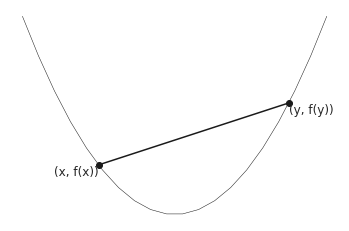

In [5]:
def f(x):
    return x**2

X = np.linspace(-2, 2, 20)
x = -1
y = 1.5

# plot function
fig, ax = plt.subplots()
ax.plot(X, f(X),  "k-", lw=0.5)

# plot f(x), and f(y)
ax.plot(x, f(x), "ko")
ax.plot(y, f(y), "ko")

# plot chord between (x, f(x)) and (y, f(y))
ax.plot([x, y], [f(x), f(y)], "k-")

# add annotations
ax.text(x, f(x), "(x, f(x))", verticalalignment="top", horizontalalignment="right")
ax.text(y, f(y), "(y, f(y))", verticalalignment="top", horizontalalignment="left")
ax.axis("off");


<a id='exercise-3'></a>
**Exercise 4**

Show that all linear functions are convex

*Hint:* To do this show that the convexity inequality above (condition 2) holds with equality when $f$ is linear

#### First order conditions

Define $\nabla f$ as the *gradient* of $f$: $$\nabla f \equiv \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n}\end{bmatrix}$$

$f$ is convex if and only if for all $x, y \in \textbf{dom} f$

$$f(y) \ge f(x) + \nabla f(x)^T (y - x)$$

The right hand side is an affine function of $y$ and is the first-order Taylor approximation of $f$ around $x$

The interpretation of the inequality says that the first-order Taylor approximation is a *global underestimator* of $f$

For convex functions **local** information (first-order Taylor approximation around $x$) provides **global** information

We will use this property heavily when considering optimization because $$\nabla f(x) = 0 \Longrightarrow x \text{ is a global minimizer of } f$$

## Linear Programs

A **linear program** is an optimization problem of the form

$$\begin{align*}
\min_x \ & c^T x \\
\mbox{subject to } \ & Gx \le h \\
& Ax = b\\
\end{align*}$$

### Standard Form

A *linear program in standard form* has only equality constraints and a non-negativity constraint on $x$:

$$\begin{align*}
\min_x \ & c^T x \\
& Ax = b,\\
& x_i \ge 0 \; \forall i
\end{align*}$$

<a id='exercise-4'></a>
**Exercise 5**

Convert a linear program in the general form to a linear program in standard form


*Hint:* You will need to introduce a new vector (of slack variables) into the constraints

#### Example: Diet Problem

**Want**: Construct calorie minimizing diet of $m$ distinct foods, subject to obtaining a minimum level of $k$ nutrients

Let 

- $c_i$ for $i = 1, \dots, m$ represent calories per serving of food $i$ 
- $a_{i,j}$ for $i=1,\dots,k$ and $j=1,\dots, m$ represent the amount of nutrient $i$ in food $j$
- $b_i$ for $i=1,\dots,k$ be the minimum level of nutrient $i$ needed






##### A linear program

We can formulate the diet problem as a linear program by

- Constructing a matrix $A$ of all the $a_{k,m}$ values. Each column will represent nutrient values per serving of a single food, while each row will be value of a single nutrient in all foods
- Stack the nutrient requirements $b_k$ in a column vector, matching the order of the rows of $A$

Then, the linear program can be written

$$\begin{align*}
\min_x \ & c^T x \\
& Ax \ge b,\\
& x_i \ge 0 \; i=1,\dots,m
\end{align*}$$

> NOTE: the line $Ax \ge b$ is shorthand for imposing the inequality elementwise (row by row)

##### Convert to standard form

We can convert the linear program to standard form by:

- Multiplying the $Ax \ge b$ inequality by $-1$, which is defining $\tilde{A} = -A$ and $\tilde{b} = -b$. Now inequality constraint is $$\tilde{A} x \le \tilde{b}$$
- Add a vector slack variables to the modified inequality: $$\tilde{A} x + s = \tilde{b}$$
- Impose non-negativity on our slack vairables

The standard form LP is 

$$\begin{align*}
\min_x \ & c^T x \\
& \tilde{A}x  + s \le \tilde{b},\\
& x_i \ge 0 \; i=1,\dots,m\\
& s_i \ge 0 \; i=1,\dots,k
\end{align*}$$

<a id='exercise-5'></a>
**Exercise 6: Transportation problem**

> Note: This problem comes from "Labs for Foundations of Applied Mathematics Volume 2" by Jeffrey Humpherys And Tyler J. Jarvis released under the [Creative Commons Attribution 3.0 United States license](http://creativecommons.org/licenses/by/3.0/us/). The original source for the lab materials can be found at [https://github.com/Foundations-of-Applied-Mathematics/Labs](https://github.com/Foundations-of-Applied-Mathematics/Labs)

Consider the following transportation problem: A piano company needs to transport thirteen pianos
from their three supply centers (denoted by 1, 2, 3) to two demand centers (4, 5). Transporting a
piano from a supply center to a demand center incurs a cost, listed in the table below. The company wants to minimize shipping costs for the pianos while meeting the demand.

| Supply Center | Demand Center | Cost of Transportation | Number of Pianos | 
| :-----------: | :-----------: | :--------------------: | :--------------: |
| 1 | 4 | 4 | $p_1$ |
| 1 | 5 | 7 | $p_2$ | 
| 2 | 4 | 6 | $p_3$ | 
| 2 | 5 | 8 | $p_4$ |
| 3 | 4 | 8 | $p_5$ |
| 3 | 5 | 9 | $p_6$ |

The number of pianos available at each supply center is given by:

| Supply Center | Number of pianos available |
| :-----------: | :------------------------: |
| 1 | 7 |
| 2 | 2 | 
| 3 | 4 |

The number of pianos needed at each demand center is given by

| Demand Center | Number of pianos needed |
| :-----------: | :---------------------: |
| 4 | 5 |
| 5 | 8 |

A system of constraints can be defined using the variables $p_1$, $p_2$, $p_3$, $p_4$, $p_5$, and $p_6$.
First, there cannot be a negative number of pianos transported along any route. Next, use the supply and demand tables and the variables $p_1 \dots p_6$ to define a supply or demand constraint for each location. You may want to
format this as a matrix. Finally, the objective function is the number of pianos shipped along each
route multiplied costs found in the costs table.

Your task is to formulate the transportation problem as a linear program. That is define the vector $c$, matrix $A$ and vector $b$ that appropriately defines the problem as described above.

## The Dual Problem

## Python Tools: `cvxopt` and `scipy.optimize.linprog`

### `cvxopt`

### `scipy.optimize.linprog`

### References

Boyd, Stephen, Stephen P. Boyd, and Lieven Vandenberghe. 2004. Convex Optimization. Cambridge University Press.